In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import json
from pathlib import Path


#Source: https://the-odds-api.com/
url = f'https://api.the-odds-api.com/v4/sports/basketball_nba/odds/?daysFrom=3&apiKey=eaa265db381b34b1dbe2ce35e2628048&regions=us&markets=h2h,spreads&oddsFormat=american'
betting_text = requests.get(url).text
betting_data = json.loads(betting_text)

In [2]:
# Length of the betting_data
len(betting_data)
print(betting_data)

[{'id': 'cbd8b82b0588738837914901ee311d31', 'sport_key': 'basketball_nba', 'sport_title': 'NBA', 'commence_time': '2023-03-14T23:00:00Z', 'home_team': 'Charlotte Hornets', 'away_team': 'Cleveland Cavaliers', 'bookmakers': [{'key': 'draftkings', 'title': 'DraftKings', 'last_update': '2023-03-14T22:53:31Z', 'markets': [{'key': 'h2h', 'last_update': '2023-03-14T22:53:31Z', 'outcomes': [{'name': 'Charlotte Hornets', 'price': 175}, {'name': 'Cleveland Cavaliers', 'price': -205}]}, {'key': 'spreads', 'last_update': '2023-03-14T22:53:31Z', 'outcomes': [{'name': 'Charlotte Hornets', 'price': -110, 'point': 5.5}, {'name': 'Cleveland Cavaliers', 'price': -110, 'point': -5.5}]}]}, {'key': 'fanduel', 'title': 'FanDuel', 'last_update': '2023-03-14T22:53:31Z', 'markets': [{'key': 'h2h', 'last_update': '2023-03-14T22:53:31Z', 'outcomes': [{'name': 'Charlotte Hornets', 'price': 176}, {'name': 'Cleveland Cavaliers', 'price': -210}]}, {'key': 'spreads', 'last_update': '2023-03-14T22:53:31Z', 'outcomes':

In [3]:
# looking betting data
sites_list = list()
for game in betting_data:
    bookmakers = game['bookmakers']
    for site in bookmakers:
        sites_list.append(site['title'])

In [4]:
sites_list = list(set(sites_list))

In [5]:
#init a dictionary so that we get our first look at the data
data_by_game = dict()



for game in betting_data:
    # Get the home team and away team by game and format it for easier viewing
    
    home = game['home_team']
    away = game['away_team']
    
    matchup = f'{away} @ {home}'
    
    # Keep the matchup name as the key, will store odds by site as value
    data_by_game[matchup] = dict()
    
    bookmakers = game['bookmakers']
    for site in bookmakers:
        site_title = site['title']
        data_by_game[matchup][site_title] = dict()
        markets = site['markets']
        
        for market in markets:
            bet_format = market['key']
            data_by_game[matchup][site_title][bet_format] = market['outcomes']
                     
#import pretty printer
import pprint

#this library helps us see all of the nested dictionaries 
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(data_by_game)

{   'Boston Celtics @ Minnesota Timberwolves': {   'BetOnline.ag': {   'spreads': [   {   'name': 'Boston '
                                                                                                  'Celtics',
                                                                                          'point': -5.0,
                                                                                          'price': -114},
                                                                                      {   'name': 'Minnesota '
                                                                                                  'Timberwolves',
                                                                                          'point': 5.0,
                                                                                          'price': -108}]},
                                                   'Bovada': {   'h2h': [   {   'name': 'Boston '
                                     

## Build Data DataFrame and Visualizations 

In [15]:

# init dataframe
df_bets = pd.DataFrame()

for game in betting_data:
    # Get the home team and away team by game and format it for easier viewing
    
    team_home = game['home_team']
    team_away = game['away_team']
    Game_ID = game['id']
    
    bookmakers = game['bookmakers']
    
    for site in bookmakers:
        site_title = site['title']
        #data_by_game[matchup][site_title] = dict()
        markets = site['markets']
        
             
        for market in markets:
            bet_format = market['key']
            bet = market['outcomes']
            
            
            # create a dictionary and add all of the required items to it 
            bet_dict = {}
            bet_dict['Game_ID'] = Game_ID
            bet_dict['bet_format'] = market['key']
            
            if bet_format == 'spreads':
                bet_dict['point_spread_away'] = bet[0]['point']
                bet_dict['point_spread_home'] = bet[1]['point']
            else:
                bet_dict['point_spread_away'] = 0
                bet_dict['point_spread_home'] = 0
            
            bet_dict['site_title'] = site_title
            bet_dict['home_team'] = team_home
            bet_dict['away_team'] = team_away
            
            bet_dict['price_away'] = bet[0]['price']
            bet_dict['price_home'] = bet[1]['price']
            
            df_bets = df_bets.append(bet_dict, ignore_index = True)

,Game_ID,bet_format,point_spread_away,point_spread_home,site_title,home_team,away_team,price_away,price_home
0,cbd8b82b0588738837914901ee311d31,h2h,0.0,0.0,DraftKings,Charlotte Hornets,Cleveland Cavaliers,175.0,-205.0
1,cbd8b82b0588738837914901ee311d31,spreads,5.5,-5.5,DraftKings,Charlotte Hornets,Cleveland Cavaliers,-110.0,-110.0
2,cbd8b82b0588738837914901ee311d31,h2h,0.0,0.0,FanDuel,Charlotte Hornets,Cleveland Cavaliers,176.0,-210.0
3,cbd8b82b0588738837914901ee311d31,spreads,5.0,-5.0,FanDuel,Charlotte Hornets,Cleveland Cavaliers,-106.0,-114.0
4,cbd8b82b0588738837914901ee311d31,h2h,0.0,0.0,BetMGM,Charlotte Hornets,Cleveland Cavaliers,180.0,-225.0
...,...,...,...,...,...,...,...,...,...
333,94d96c799bd41cd4e7b8bffff53b9549,spreads,2.5,-2.5,WynnBET,Los Angeles Clippers,Golden State Warriors,-110.0,-110.0
334,94d96c799bd41cd4e7b8bffff53b9549,h2h,0.0,0.0,Bovada,Los Angeles Clippers,Golden State Warriors,120.0,-140.0
335,94d96c799bd41cd4e7b8bffff53b9549,spreads,2.5,-2.5,Bovada,Los Angeles Clippers,Golden State Warriors,-110.0,-110.0
336,94d96c799bd41cd4e7b8bffff53b9549,h2h,0.0,0.0,FanDuel,Los Angeles Clippers,Golden State Warriors,118.0,-138.0


In [7]:
df_bets_grouped = df_bets.groupby('Game_ID')

Text(0.5, 1.0, 'Charlotte Hornets @ Cleveland Cavaliers ')

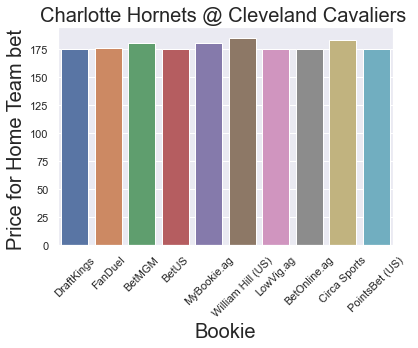

In [8]:
# bool index to head to head bets 
h2h = df_bets['bet_format'] == 'h2h'
df_bets_h2h = df_bets.loc[h2h, :]


#Now for set game ID as inidexing to try and simply the viz 
df_bets_h2h = df_bets_h2h.set_index('Game_ID')

# lets look at the first game 
game_1 = df_bets_h2h.loc[df_bets_h2h.index[0]]


#Import some additional packages
import matplotlib.pyplot as plt
import seaborn as sns


# Building a vizualisaiton best for the 10 options from our dataset to show that there is a significant difference
sns.set()
chart = sns.barplot(x="site_title",y = "price_away",data= game_1.iloc[:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_xlabel("Bookie", fontsize = 20)
chart.set_ylabel("Price for Home Team bet ", fontsize = 20)

home_team_Str = game_1['home_team'][0]
away_team_Str = game_1['away_team'][0]

chart.set_title(f'{home_team_Str} @ {away_team_Str} ', fontsize = 20)

Text(0.5, 1.0, 'Denver Nuggets @ Toronto Raptors')

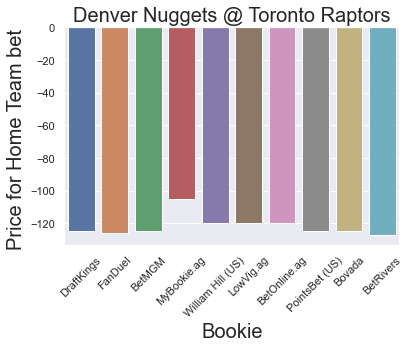

In [9]:
## Very similar to the one abovea

game_2 = df_bets_h2h.loc[df_bets_h2h.index[44]]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
chart = sns.barplot(x="site_title",y = "price_away",data= game_2.iloc[:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_xlabel("Bookie", fontsize = 20)
chart.set_ylabel("Price for Home Team bet ", fontsize = 20)

home_team_Str = game_2['home_team'][0]
away_team_Str = game_2['away_team'][0]

chart.set_title(f'{away_team_Str} @ {home_team_Str}', fontsize = 20)

In [10]:
df_bets

,Game_ID,bet_format,point_spread_away,point_spread_home,site_title,home_team,away_team,price_away,price_home
0,cbd8b82b0588738837914901ee311d31,h2h,0.0,0.0,DraftKings,Charlotte Hornets,Cleveland Cavaliers,175.0,-205.0
1,cbd8b82b0588738837914901ee311d31,spreads,5.5,-5.5,DraftKings,Charlotte Hornets,Cleveland Cavaliers,-110.0,-110.0
2,cbd8b82b0588738837914901ee311d31,h2h,0.0,0.0,FanDuel,Charlotte Hornets,Cleveland Cavaliers,176.0,-210.0
3,cbd8b82b0588738837914901ee311d31,spreads,5.0,-5.0,FanDuel,Charlotte Hornets,Cleveland Cavaliers,-106.0,-114.0
4,cbd8b82b0588738837914901ee311d31,h2h,0.0,0.0,BetMGM,Charlotte Hornets,Cleveland Cavaliers,180.0,-225.0
...,...,...,...,...,...,...,...,...,...
333,94d96c799bd41cd4e7b8bffff53b9549,spreads,2.5,-2.5,WynnBET,Los Angeles Clippers,Golden State Warriors,-110.0,-110.0
334,94d96c799bd41cd4e7b8bffff53b9549,h2h,0.0,0.0,Bovada,Los Angeles Clippers,Golden State Warriors,120.0,-140.0
335,94d96c799bd41cd4e7b8bffff53b9549,spreads,2.5,-2.5,Bovada,Los Angeles Clippers,Golden State Warriors,-110.0,-110.0
336,94d96c799bd41cd4e7b8bffff53b9549,h2h,0.0,0.0,FanDuel,Los Angeles Clippers,Golden State Warriors,118.0,-138.0


In [11]:
df_bets_ = df_bets.set_index('Game_ID','site_title')

# Get just the h2h odds
h2h = df_bets_['bet_format'] == 'h2h'
df_bets_h2h = df_bets_.loc[h2h, :]

# Select what columns we want to keep to make the dataframe easier to work with
df_bets_h2h = df_bets_h2h[['bet_format', 'away_team', 'home_team', 'price_home', 'site_title']]
min_home_odds = df_bets_h2h.groupby('home_team')['price_home'].min()

min_odds_dict = min_home_odds.to_dict()


/var/folders/7x/zdw322_90b70b5ytp4v1yqhh0000gn/T/ipykernel_23790/2742900209.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  df_bets_ = df_bets.set_index('Game_ID','site_title')


In [12]:
min_site_counts = list()


for key, value in min_odds_dict.items():
    row = df_bets_h2h.loc[(df_bets_h2h['home_team'] == key) & (df_bets_h2h['price_home'] == value)]
    site = row['site_title']
    min_site_counts += list(site.values)

min_site_counts

['FOX Bet',
 'DraftKings',
 'William Hill (US)',
 'Bovada',
 'DraftKings',
 'William Hill (US)',
 'Bovada',
 'William Hill (US)',
 'Bovada',
 'FanDuel',
 'MyBookie.ag',
 'FOX Bet',
 'Barstool Sportsbook',
 'BetRivers',
 'TwinSpires',
 'Unibet',
 'SugarHouse',
 'FOX Bet',
 'BetOnline.ag',
 'LowVig.ag',
 'BetMGM',
 'PointsBet (US)',
 'William Hill (US)',
 'WynnBET',
 'SuperBook',
 'FOX Bet',
 'MyBookie.ag',
 'MyBookie.ag',
 'Circa Sports']

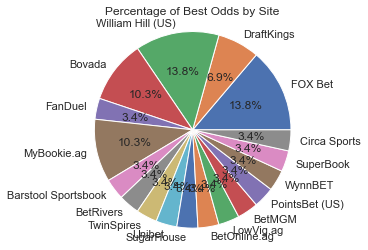

In [13]:
from collections import Counter

site_counts = dict(Counter(min_site_counts))

# Initialize lists for pie chart
labels = list()
sizes = list()

# Split up dictionary into separate lists
for site, count in site_counts.items():
    labels.append(site)
    sizes.append(count)
    
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Best Odds by Site')
plt.show()

In [14]:
df_bets.to_csv("NBA_Bets.csv", encoding='utf-8', index=False)